###Scraping APK Streaming duolingo dan hellotalk

In [2]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00


In [5]:
from google_play_scraper import reviews, app, Sort
import pandas as pd
import numpy as np


In [15]:
result, continuation_token = reviews(
    "com.duolingo",
    # "com.hellotalk",
    lang="id",
    country="id",
    sort=Sort.MOST_RELEVANT,
    count=4500,
    filter_score_with=None
)

In [16]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bb99b093-3062-43a5-9abc-fd6d56a6a628,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mungkin bagi yang merasa terganggu dengan geta...,5,53,6.60.6,2026-01-08 15:01:41,None,None,6.60.6
1,422168fb-efc8-416f-bd52-4754ef203ba5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bagusss banget apknya, ngelatih kemampuan baha...",5,97,6.60.6,2026-01-07 02:23:05,None,None,6.60.6
2,4be141bf-ba95-4f79-9562-c737092ee62f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"apk ini bagus si, tpi klo bisa tambahin fitur ...",4,43,6.60.6,2025-12-24 16:45:57,None,None,6.60.6
3,740f5c80-66cc-439e-ac68-aa0f49fa52b7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dear Duolingo. saya kurang mengerti mengapa ka...,1,24,6.60.6,2026-01-07 15:43:55,None,None,6.60.6
4,5bff069c-3b7a-4d52-91ff-8f9f4bf9ac0a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Duolingo Sangat Membantu Saya Dalam B...,5,88,6.60.6,2026-01-06 18:13:47,None,None,6.60.6


In [17]:
# Mengambil beberapa kolom
data = data[['content', 'score']]
data.head()

,content,score
0,Mungkin bagi yang merasa terganggu dengan geta...,5
1,"bagusss banget apknya, ngelatih kemampuan baha...",5
2,"apk ini bagus si, tpi klo bisa tambahin fitur ...",4
3,dear Duolingo. saya kurang mengerti mengapa ka...,1
4,Aplikasi Duolingo Sangat Membantu Saya Dalam B...,5


In [18]:
# duolingo
len(data)

4500

In [9]:
# hellotalk
len(data)

3083

In [19]:
# eksport dataset
data.to_csv('review_duolingo.csv', index=False, encoding='utf-8')

In [10]:
# eksport dataset
data.to_csv('review_hellotalk.csv', index=False, encoding='utf-8')

###Load data

In [20]:
df_duo = pd.read_csv("review_duolingo.csv")
df_hello = pd.read_csv("review_hellotalk.csv")


In [21]:
df_duo.head()

,content,score
0,Mungkin bagi yang merasa terganggu dengan geta...,5
1,"bagusss banget apknya, ngelatih kemampuan baha...",5
2,"apk ini bagus si, tpi klo bisa tambahin fitur ...",4
3,dear Duolingo. saya kurang mengerti mengapa ka...,1
4,Aplikasi Duolingo Sangat Membantu Saya Dalam B...,5


In [22]:
df_hello.head()

,content,score
0,"banyak teman, banyak rejeki. seneng banget bis...",5
1,"apknya awal awalnya bagus, terus beberapa hari...",1
2,"untuk sementara ratingnya penggunaan hanya 6,2...",2
3,"aplikasinya bagus, tapi kenapa riwayat obrolan...",2
4,ini knpa ya mau nambah photo profil ga bsa?? t...,1


###Eksploratory data analysis

In [23]:
df_duo.shape

(4500, 2)

In [24]:
df_hello.shape

(3083, 2)

In [25]:
df_duo.columns

Index(['content', 'score'], dtype='object')

In [26]:
df_hello.columns

Index(['content', 'score'], dtype='object')

In [27]:
df_duo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  4500 non-null   object
 1   score    4500 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.4+ KB


In [28]:
df_hello.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  3082 non-null   object
 1   score    3083 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.3+ KB


In [29]:
# missing value
df_duo.isnull().sum()

,0
content,0
score,0


In [30]:
# missing value
df_hello.isnull().sum()

,0
content,1
score,0


In [31]:
# data duplikat
df_duo.duplicated().any()

np.True_

In [32]:
# data duplikat
df_hello.duplicated().any()

np.True_

In [33]:
df_duo['score'].value_counts()

,count
score,
5,3325
4,529
1,258
3,245
2,143


In [34]:
df_hello['score'].value_counts()

,count
score,
5,1652
1,526
4,398
3,301
2,206


In [ ]:
# # hapus data duplikat
# df_duo.drop_duplicates(inplace=True)

###Labeling rating

In [35]:
def rating_to_sentiment(rating):
    if rating >= 4:
        return "Positif"
    elif rating == 3:
        return "Netral"
    else:
        return "Negatif"

df_duo["sentiment"] = df_duo["score"].apply(rating_to_sentiment)
df_hello["sentiment"] = df_hello["score"].apply(rating_to_sentiment)


In [36]:
df_duo.head()

,content,score,sentiment
0,Mungkin bagi yang merasa terganggu dengan geta...,5,Positif
1,"bagusss banget apknya, ngelatih kemampuan baha...",5,Positif
2,"apk ini bagus si, tpi klo bisa tambahin fitur ...",4,Positif
3,dear Duolingo. saya kurang mengerti mengapa ka...,1,Negatif
4,Aplikasi Duolingo Sangat Membantu Saya Dalam B...,5,Positif


In [37]:
df_hello.head()

,content,score,sentiment
0,"banyak teman, banyak rejeki. seneng banget bis...",5,Positif
1,"apknya awal awalnya bagus, terus beberapa hari...",1,Negatif
2,"untuk sementara ratingnya penggunaan hanya 6,2...",2,Negatif
3,"aplikasinya bagus, tapi kenapa riwayat obrolan...",2,Negatif
4,ini knpa ya mau nambah photo profil ga bsa?? t...,1,Negatif


###Distribusi data sentimen rating-based

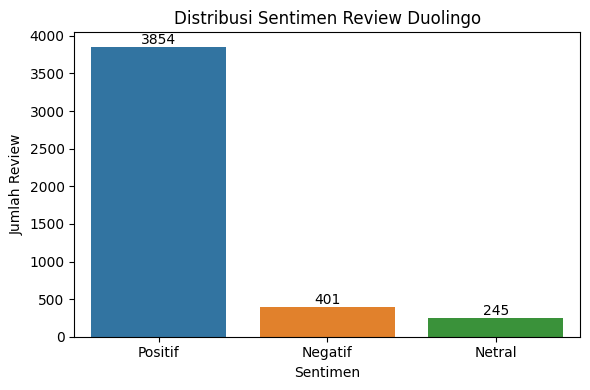

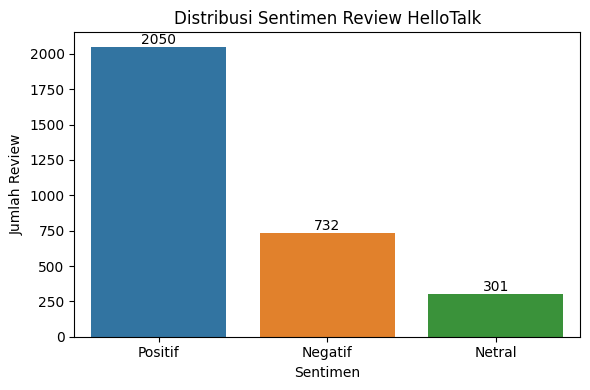

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

def label_distribution(df, app_name):
    sentiment_counts = df["sentiment"].value_counts().reset_index()
    sentiment_counts.columns = ["Sentiment", "Jumlah"]

    plt.figure(figsize=(6,4))
    sns.barplot(
        data=sentiment_counts,
        x="Sentiment",
        y="Jumlah",
        hue="Sentiment",
        legend=False
    )


    plt.title(f"Distribusi Sentimen Review {app_name}")
    plt.xlabel("Sentimen")
    plt.ylabel("Jumlah Review")

    # Tambahkan angka di atas bar
    for index, row in sentiment_counts.iterrows():
        plt.text(index, row["Jumlah"], row["Jumlah"],
                 ha="center", va="bottom")

    plt.tight_layout()
    plt.show()


label_distribution(df_duo, "Duolingo")
label_distribution(df_hello, "HelloTalk")


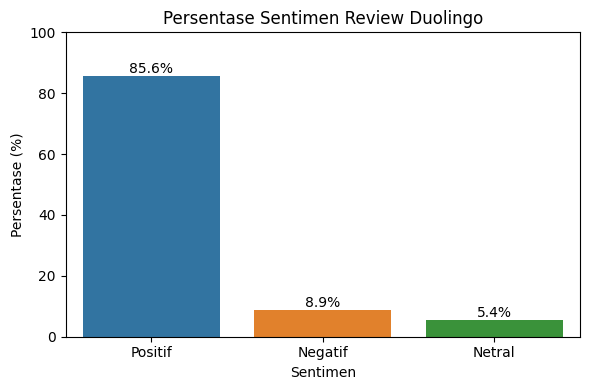

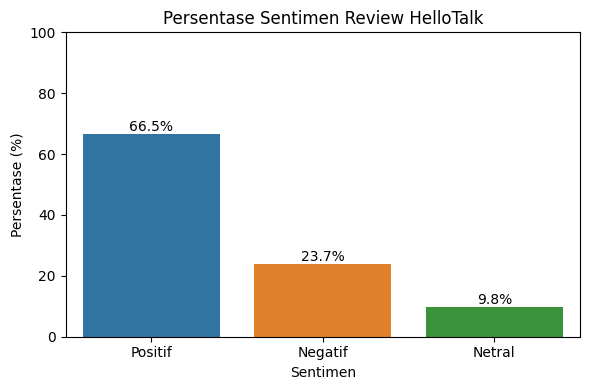

In [39]:
def plot_label_percentage(df, app_name):
    sentiment_percent = (
        df["sentiment"]
        .value_counts(normalize=True)
        .mul(100)
        .reset_index()
    )
    sentiment_percent.columns = ["Sentiment", "Persentase"]

    plt.figure(figsize=(6,4))
    sns.barplot(
        data=sentiment_percent,
        x="Sentiment",
        y="Persentase",
        hue="Sentiment",
        legend=False
    )

    plt.title(f"Persentase Sentimen Review {app_name}")
    plt.xlabel("Sentimen")
    plt.ylabel("Persentase (%)")

    for index, row in sentiment_percent.iterrows():
        plt.text(index, row["Persentase"], f"{row['Persentase']:.1f}%",
                 ha="center", va="bottom")

    plt.ylim(0,100)
    plt.tight_layout()
    plt.show()


plot_label_percentage(df_duo, "Duolingo")
plot_label_percentage(df_hello, "HelloTalk")


###Package & Library

In [40]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 13.7 MB/s eta 0:00:00


In [41]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.6 MB/s eta 0:00:00


In [42]:
import re
import string
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import emoji
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')


In [43]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

###Preprocessing

In [44]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [45]:
# inisialasiasi stopwords
stop_words = set(stopwords.words('indonesian'))

custom_stopwords = {
    'jadi','ini','si','tpi','klo','bisa','paling','di','wkwk','udah','nya','terus','gk','hahahaha','tapi','kami','apk','duolingo','hellotalk','helotalk',
    'hahah','haha','hahaha','cuma','wkwkw','hahah','ahahah','yuhu','doang','hadeh','awokawk','doank','ahaha','hehe','daripada','juga','ada','saya',
    'yang','lagi','aku','seperti','pada','karena','karna','tau','aja','kalau','mau','bgt','kt','jd','lbh','tntng','dan','ya','sya','yg','apl','ga',
    'drpd','untuk','kita','kalian','gak','oh','iya','dong','lah','sangat','banget','adalah','aplikasi','lingho','gitu','kalo','namun','deh','lingo','agar',
    'apknya','pnya','pengen','pngen','apanya','helo', 'talk', 'bikin','kayak','pliis','pake','plis','coba','kali','tetep','gabisa','pake','biar','kali','emang',
    'emng', 'make', 'apa'
}

stop_words.update(custom_stopwords)

In [46]:
# fungsi hapus emoji
# def remove_emojis(text):
#     return emoji.demojize(text)

def remove_emojis(text: str) -> str:
    emoji_pattern = re.compile("["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

# fungsi hapus tag html
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [47]:
# fungsi clean text
def clean_text(text):

    # Convert to string to handle potential non-string types (like floats/NaN)
    text = str(text)

    # 1. Case Folding
    text = text.lower()

    # 2. Hapus HTML Tags
    text = remove_html_tags(text)

    # 3. Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 4. Hapus Emoji
    text = remove_emojis(text)

    # 5. normalisasi huruf berulang
    text = re.sub(r'([a-zA-Z])\1{2,}', r'\1\1', text)

    # 6. Hapus angka, tanda baca, dan karakter non-alfanumerik/spasi
    text = re.sub(r'[^a-z\s]', ' ', text)

    # 7. Tokenize
    tokens = word_tokenize(text)

    # 8. Hapus Stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 9. hapus kata yang kurang dari 3 huruf
    tokens = [word for word in tokens if len(word) > 3]

    # 10. Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # 11. Hapus Whitespace berlebih
    cleaned = " ".join(tokens).strip()

    return cleaned

In [48]:
df_duo["cleaned"] = df_duo["content"].apply(clean_text)
df_duo.head()

,content,score,sentiment,cleaned
0,Mungkin bagi yang merasa terganggu dengan geta...,5,Positif,ganggu getar selesai ajar masuk atur preferens...
1,"bagusss banget apknya, ngelatih kemampuan baha...",5,Positif,baguss ngelatih mampu bahasa kadang muncul str...
2,"apk ini bagus si, tpi klo bisa tambahin fitur ...",4,Positif,bagus tambahin fitur jeda ajar mulu baik kadan...
3,dear Duolingo. saya kurang mengerti mengapa ka...,1,Negatif,dear erti rubah sistem hati energi mekanik but...
4,Aplikasi Duolingo Sangat Membantu Saya Dalam B...,5,Positif,bantu ajar bahasa jepang unit sayang energi ce...


In [49]:
df_hello["cleaned"] = df_hello["content"].apply(clean_text)
df_hello.head()

,content,score,sentiment,cleaned
0,"banyak teman, banyak rejeki. seneng banget bis...",5,Positif,teman rejeki neng teman negeri ajar bahasa dun...
1,"apknya awal awalnya bagus, terus beberapa hari...",1,Negatif,bagus buka warna putih gamabr obrol muncul mik...
2,"untuk sementara ratingnya penggunaan hanya 6,2...",2,Negatif,ratingnya guna karena kendala delay message ga...
3,"aplikasinya bagus, tapi kenapa riwayat obrolan...",2,Negatif,aplikasi bagus riwayat obrol hilang kirim pesa...
4,ini knpa ya mau nambah photo profil ga bsa?? t...,1,Negatif,knpa nambah photo profil tolong bnyk bngt foto...


In [50]:
print("Missing value Duolingo:")
print(df_duo["cleaned"].isna().sum())

print("\nMissing value HelloTalk:")
print(df_hello["cleaned"].isna().sum())


Missing value Duolingo:
0

Missing value HelloTalk:
0


In [51]:
# missing & NaN
df_duo = df_duo.dropna(subset=["cleaned"])
df_duo = df_duo[df_duo["cleaned"].str.strip() != ""]

In [52]:
# missing & NaN
df_hello = df_hello.dropna(subset=["cleaned"])
df_hello = df_hello[df_hello["cleaned"].str.strip() != ""]

In [53]:
# reset index
df_duo.reset_index(drop=True, inplace=True)
df_hello.reset_index(drop=True, inplace=True)

In [54]:
len(df_duo)

4490

In [55]:
len(df_hello)

2896

In [40]:
# eksport preprocessing
df_duo.to_csv('PRE_duolingo.csv', index=False, encoding='utf-8')

In [41]:
# eksport preprocessing
df_hello.to_csv('PRE_hellotalk.csv', index=False, encoding='utf-8')

###Validasi label dengan Lexicon

In [56]:
# load lexicon positif
lex_pos_df = pd.read_csv("/content/drive/MyDrive/PemrosesanTeksTeori/positive.tsv", sep="\t")
lex_neg_df = pd.read_csv("/content/drive/MyDrive/PemrosesanTeksTeori/negative.tsv", sep="\t")

# ubah ke dictionary: word -> weight
lexicon_positive = dict(zip(lex_pos_df["word"], lex_pos_df["weight"]))
lexicon_negative = dict(zip(lex_neg_df["word"], lex_neg_df["weight"]))

In [57]:
def lexicon_sentiment_indo(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Netral"

    words = text.split()
    score = 0

    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    if score > 0:
        return "Positif"
    elif score < 0:
        return "Negatif"
    else:
        return "Netral"

df_duo["lexicon_val"] = df_duo["cleaned"].apply(lexicon_sentiment_indo)
df_hello["lexicon_val"] = df_hello["cleaned"].apply(lexicon_sentiment_indo)


In [58]:
def agreement_rate(df):
    return (df["sentiment"] == df["lexicon_val"]).mean() * 100

print("Agreement Duolingo:", round(agreement_rate(df_duo), 2), "%")
print("Agreement HelloTalk:", round(agreement_rate(df_hello), 2), "%")


Agreement Duolingo: 61.71 %
Agreement HelloTalk: 55.11 %


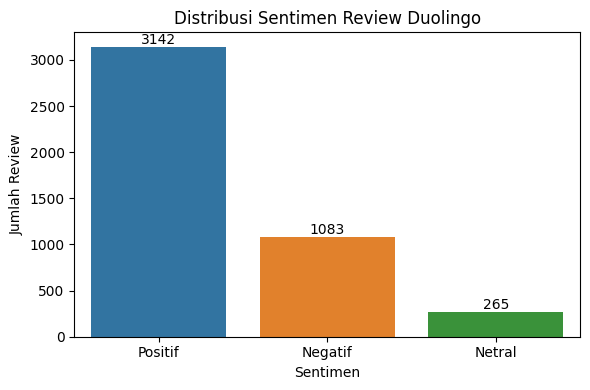

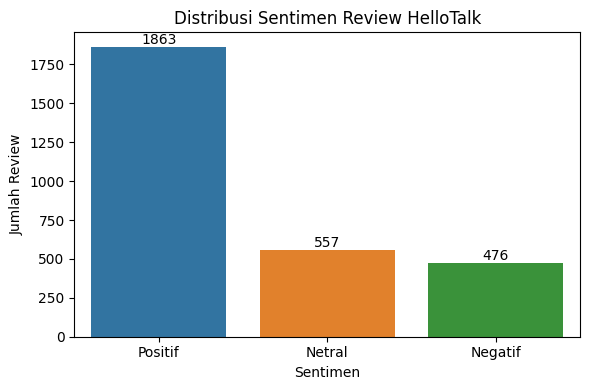

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

def label_distribution(df, app_name):
    sentiment_counts = df["lexicon_val"].value_counts().reset_index()
    sentiment_counts.columns = ["Sentiment", "Jumlah"]

    plt.figure(figsize=(6,4))
    sns.barplot(
        data=sentiment_counts,
        x="Sentiment",
        y="Jumlah",
        hue="Sentiment",
        legend=False
    )


    plt.title(f"Distribusi Sentimen Review {app_name}")
    plt.xlabel("Sentimen")
    plt.ylabel("Jumlah Review")

    # Tambahkan angka di atas bar
    for index, row in sentiment_counts.iterrows():
        plt.text(index, row["Jumlah"], row["Jumlah"],
                 ha="center", va="bottom")

    plt.tight_layout()
    plt.show()


label_distribution(df_duo, "Duolingo")
label_distribution(df_hello, "HelloTalk")


###Perbandingan label

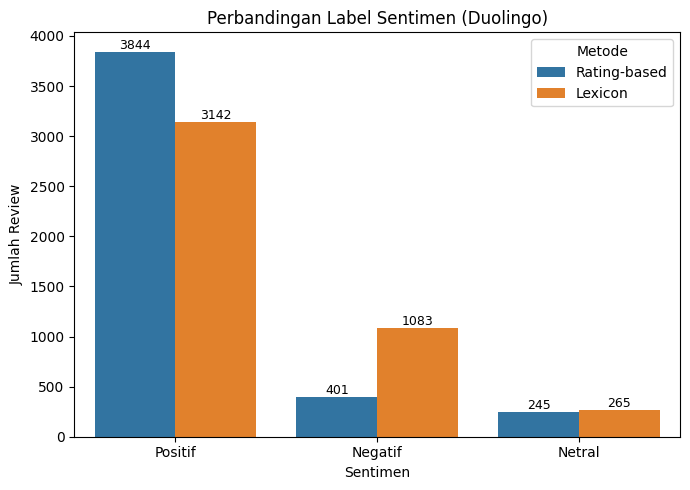

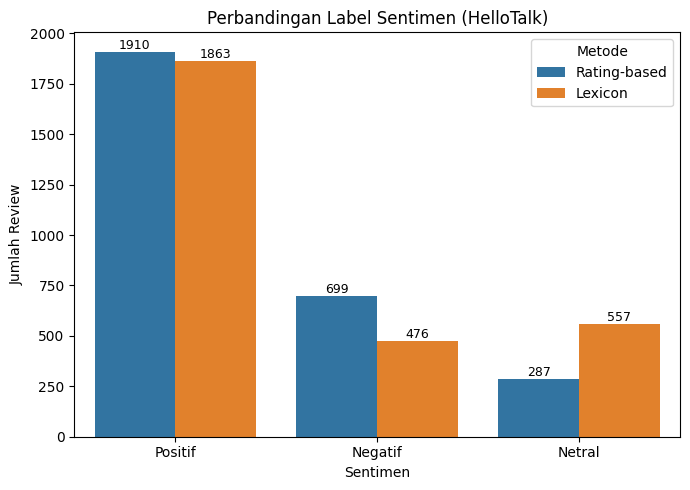

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_label_comparison(df, app_name):
    compare_df = (
        df[["sentiment", "lexicon_val"]]
        .melt(var_name="Metode", value_name="Sentimen")
    )

    compare_df["Metode"] = compare_df["Metode"].map({
        "sentiment": "Rating-based",
        "lexicon_val": "Lexicon"
    })

    plt.figure(figsize=(7,5))
    ax = sns.countplot(
        data=compare_df,
        x="Sentimen",
        hue="Metode"
    )

    plt.title(f"Perbandingan Label Sentimen ({app_name})")
    plt.xlabel("Sentimen")
    plt.ylabel("Jumlah Review")
    plt.legend(title="Metode")

    # Tambahkan angka di bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                f"{int(height)}",
                (p.get_x() + p.get_width() / 2, height),
                ha="center",
                va="bottom",
                fontsize=9
            )

    plt.tight_layout()
    plt.show()

plot_label_comparison(df_duo, "Duolingo")
plot_label_comparison(df_hello, "HelloTalk")

###N-gram

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

def plot_ngram(df, sentiment, ngram_range, top_n=10, title_suffix=""):
    texts = df[df["lexicon_val"] == sentiment]["cleaned"]

    if texts.empty:
        print(f"Tidak ada data untuk sentimen {sentiment}")
        return

    # min_df adaptif
    min_df = 5 if ngram_range[1] == 2 else 2

    vectorizer = CountVectorizer(
        ngram_range=ngram_range,
        min_df=min_df
    )

    try:
        X = vectorizer.fit_transform(texts)
    except ValueError:
        print(f"Tidak cukup data untuk {ngram_range[1]}-gram sentimen {sentiment} {title_suffix}")
        return

    counts = X.sum(axis=0).A1
    ngrams = vectorizer.get_feature_names_out()

    ngram_freq = (
        pd.DataFrame({"ngram": ngrams, "count": counts})
        .sort_values(by="count", ascending=False)
        .head(top_n)
    )

    palette_map = {
        "Positif": "Greens_r",
        "Netral": "Blues_r",
        "Negatif": "Reds_r"
    }

    plt.figure(figsize=(7,4))
    ax = sns.barplot(
        data=ngram_freq,
        x="count",
        y="ngram",
        palette=palette_map.get(sentiment, "viridis")
    )

    plt.title(
        f"{ngram_range[1]}-gram Sentimen {sentiment} {title_suffix}",
        fontsize=12,
        fontweight="bold"
    )
    plt.xlabel("Frekuensi")
    plt.ylabel("")

    # Label angka
    for p in ax.patches:
        width = p.get_width()
        ax.text(
            width + 0.5,
            p.get_y() + p.get_height() / 2,
            int(width),
            va="center",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()



###Bi-gram

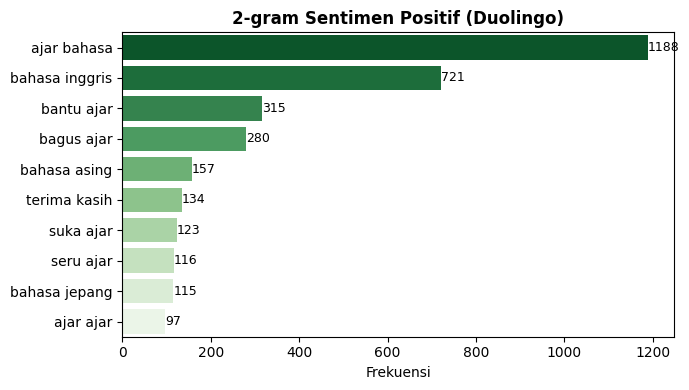

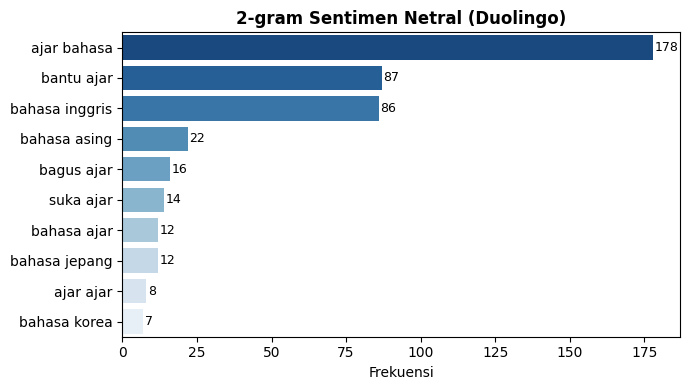

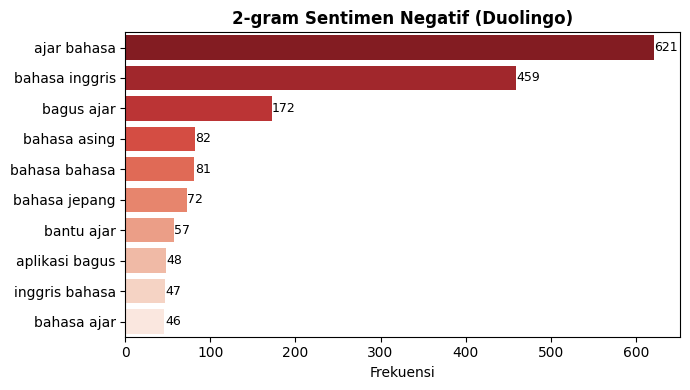

In [61]:
for sent in ["Positif", "Netral", "Negatif"]:
    plot_ngram(df_duo, sent, ngram_range=(2,2), title_suffix="(Duolingo)")


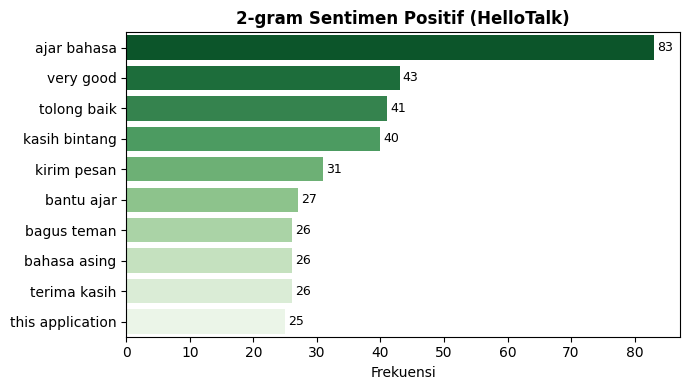

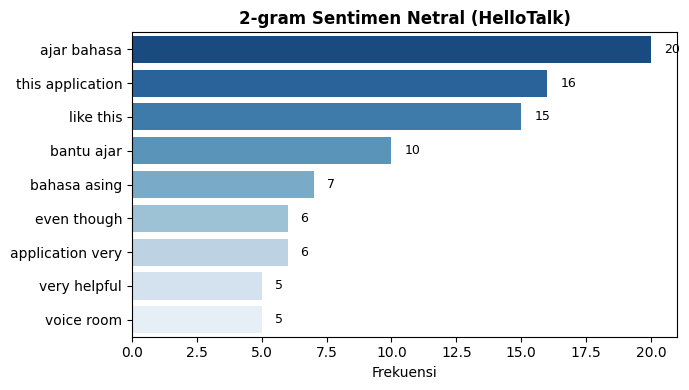

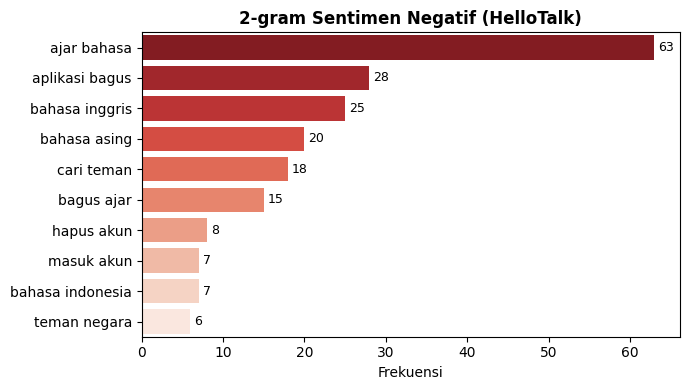

In [62]:
for sent in ["Positif", "Netral", "Negatif"]:
    plot_ngram(df_hello, sent, ngram_range=(2,2), title_suffix="(HelloTalk)")


###Tri-gram

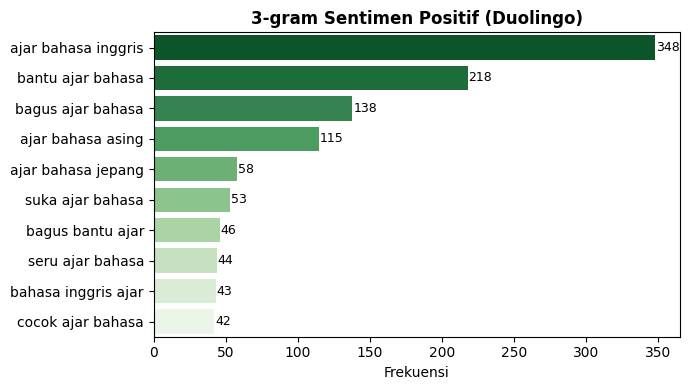

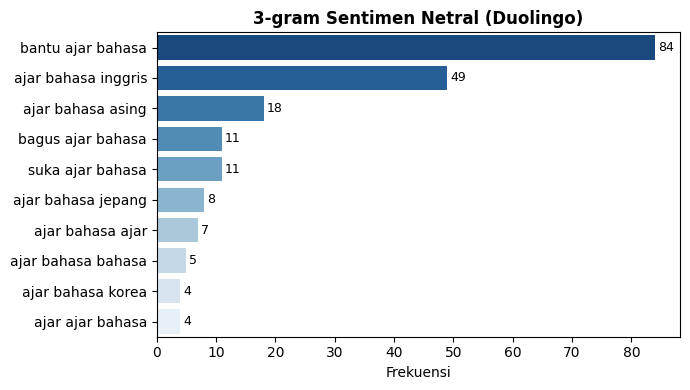

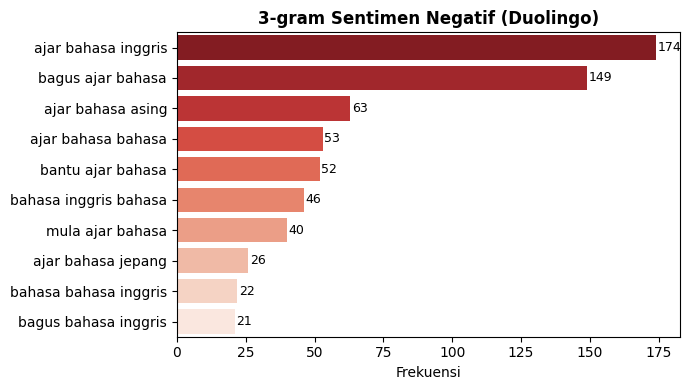

In [63]:
for sent in ["Positif", "Netral", "Negatif"]:
    plot_ngram(df_duo, sent, ngram_range=(3,3), title_suffix="(Duolingo)")


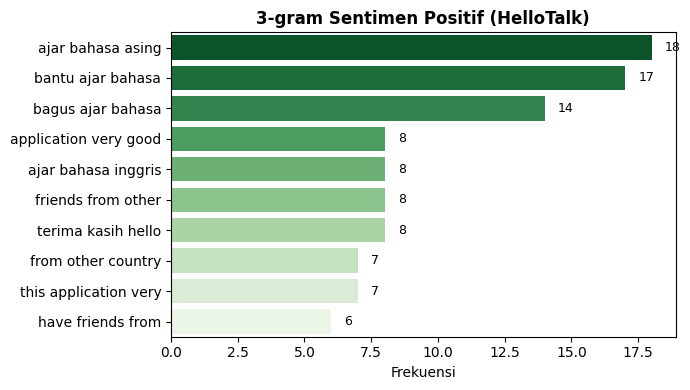

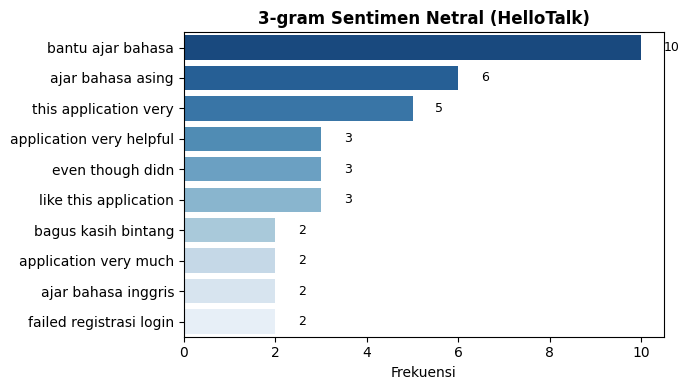

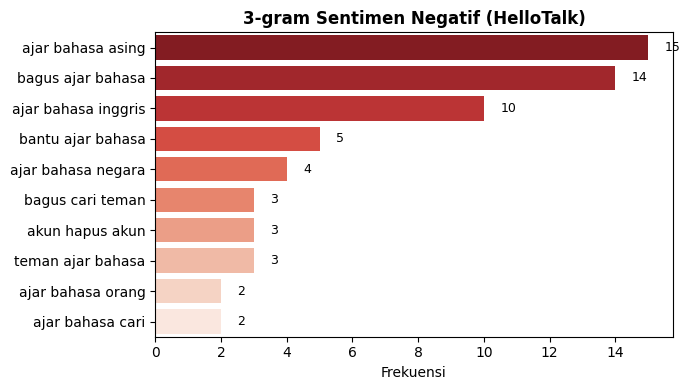

In [64]:
for sent in ["Positif", "Netral", "Negatif"]:
    plot_ngram(df_hello, sent, ngram_range=(3,3), title_suffix="(HelloTalk)")


###Quad-gram

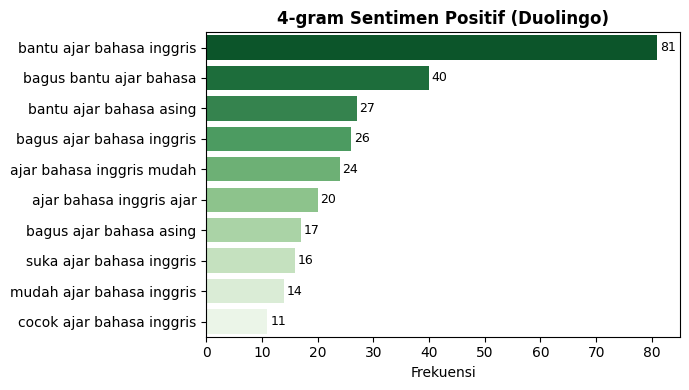

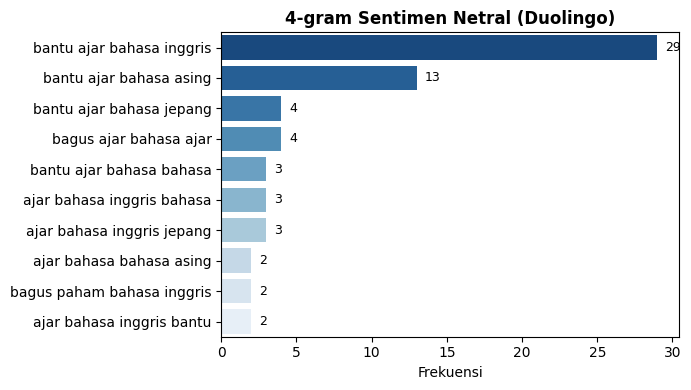

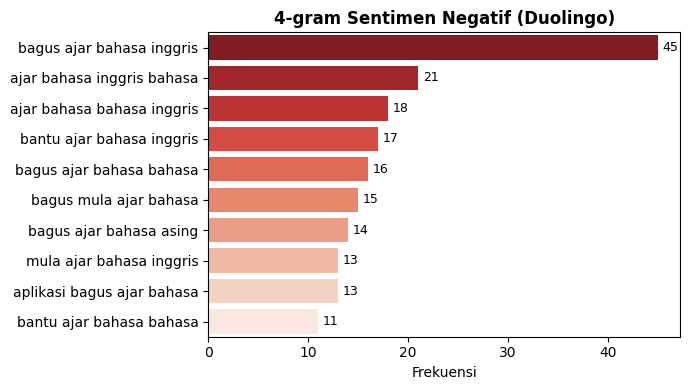

In [65]:
for sent in ["Positif", "Netral", "Negatif"]:
    plot_ngram(df_duo, sent, ngram_range=(4,4), title_suffix="(Duolingo)")


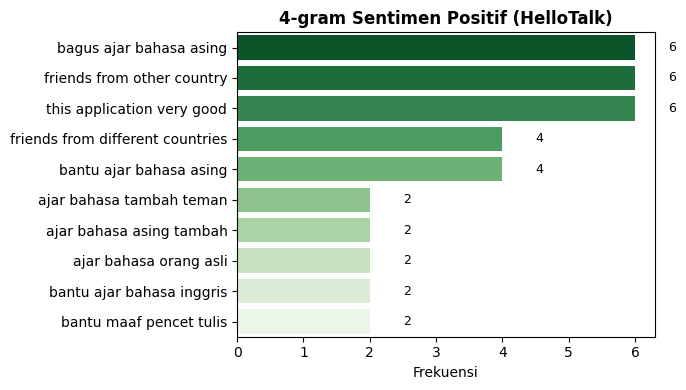

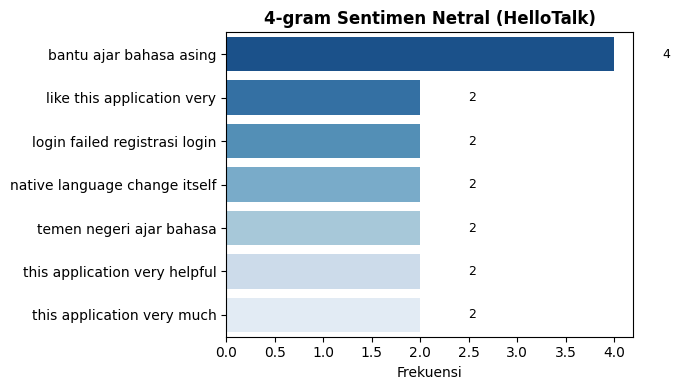

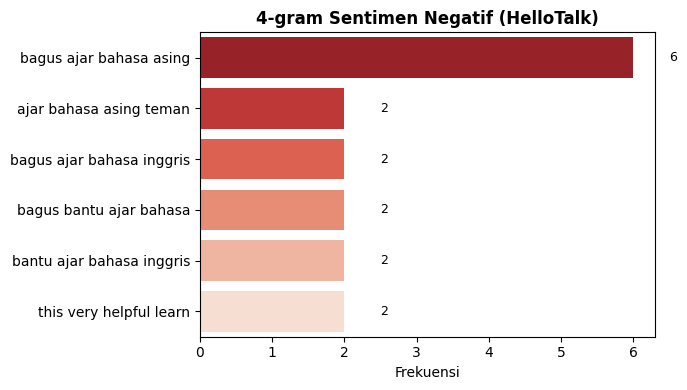

In [66]:
for sent in ["Positif", "Netral", "Negatif"]:
    plot_ngram(df_hello, sent, ngram_range=(4,4), title_suffix="(HelloTalk)")


###Wordcloud

In [67]:
def plot_wordcloud(df, sentiment, title):
    text = " ".join(df[df["lexicon_val"] == sentiment]["cleaned"])

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        collocations=False
    ).generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.tight_layout()
    plt.show()


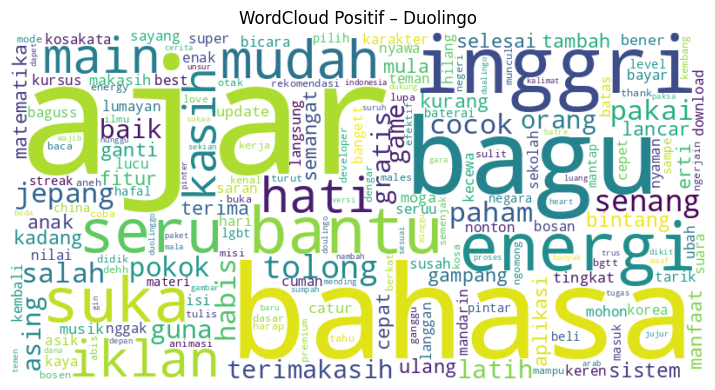

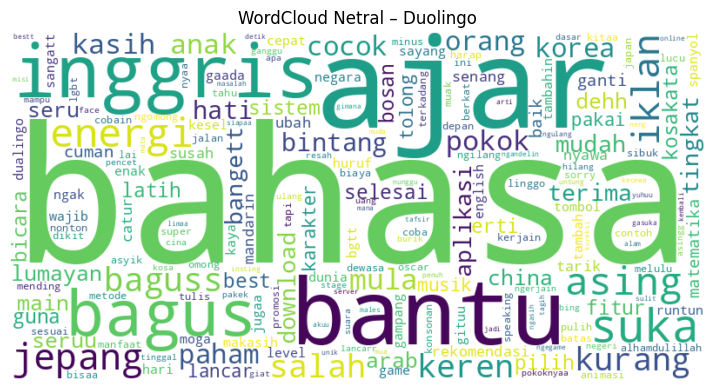

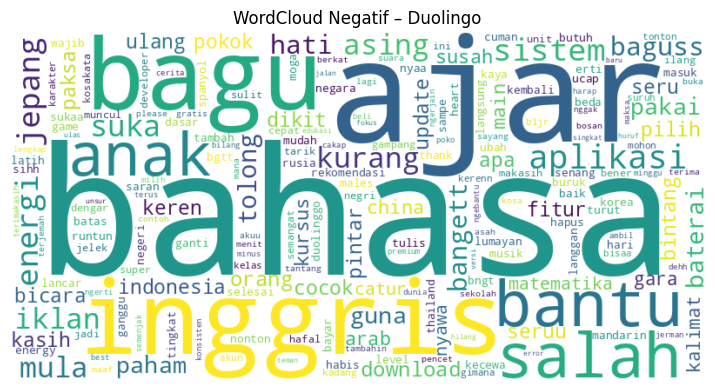

In [68]:
plot_wordcloud(df_duo, "Positif", "WordCloud Positif – Duolingo")
plot_wordcloud(df_duo, "Netral", "WordCloud Netral – Duolingo")
plot_wordcloud(df_duo, "Negatif", "WordCloud Negatif – Duolingo")


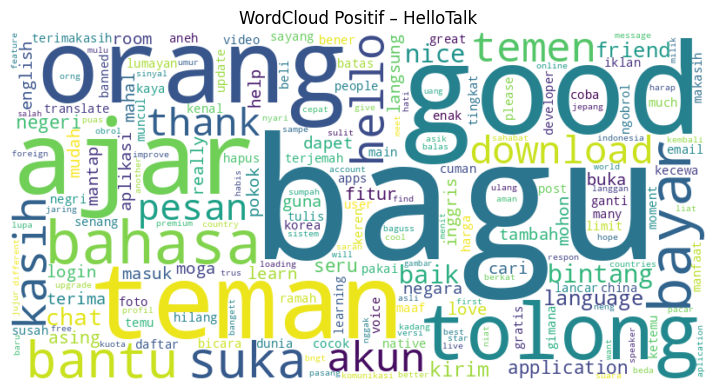

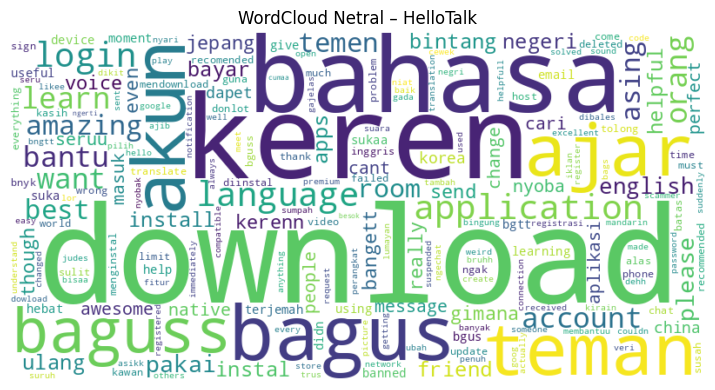

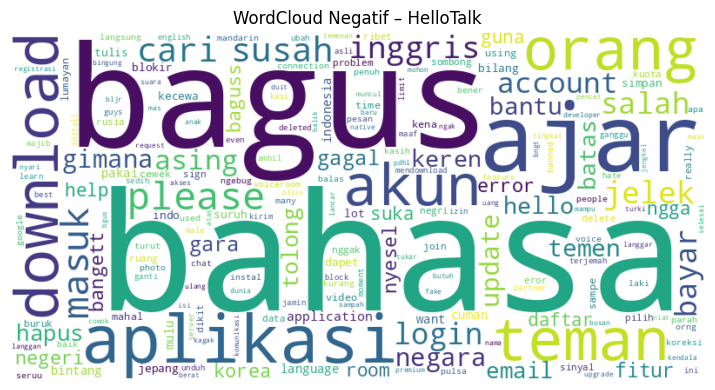

In [69]:
plot_wordcloud(df_hello, "Positif", "WordCloud Positif – HelloTalk")
plot_wordcloud(df_hello, "Netral", "WordCloud Netral – HelloTalk")
plot_wordcloud(df_hello, "Negatif", "WordCloud Negatif – HelloTalk")


###Visualisasi distribusi label

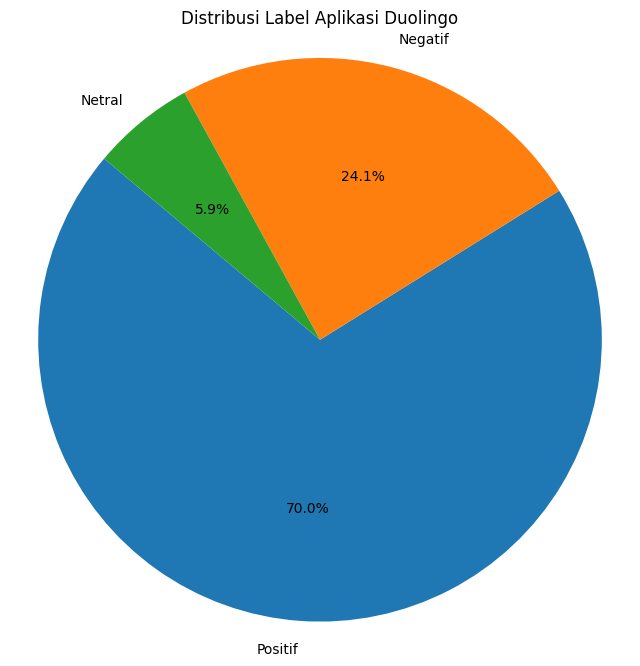

In [70]:
# menghitung jumlah tiap label
category_counts = df_duo['lexicon_val'].value_counts()

# membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Label Aplikasi Duolingo')
plt.axis('equal')
plt.show()

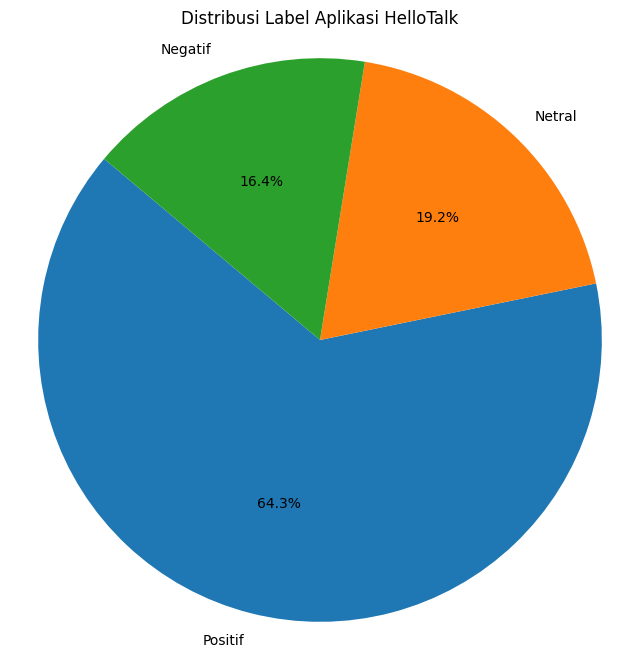

In [71]:
# menghitung jumlah tiap label
category_counts = df_hello['lexicon_val'].value_counts()

# membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Label Aplikasi HelloTalk')
plt.axis('equal')
plt.show()

###Label

In [72]:
X_duo = df_duo["cleaned"]
y_duo = df_duo["lexicon_val"]

X_hello = df_hello["cleaned"]
y_hello = df_hello["lexicon_val"]


###Encoding label

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_duo_enc = le.fit_transform(y_duo)
y_hello_enc = le.fit_transform(y_hello)

print(le.classes_)


['Negatif' 'Netral' 'Positif']


###Ekstraksi fitur TF-IDF

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),   # unigram + bigram
    min_df=5,
    max_df=0.9
)

X_duo_tfidf = tfidf.fit_transform(X_duo)
X_hello_tfidf = tfidf.fit_transform(X_hello)


###Split data

In [75]:
from sklearn.model_selection import train_test_split

X_train_duo, X_test_duo, y_train_duo, y_test_duo = train_test_split(
    X_duo_tfidf, y_duo_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_duo_enc
)

X_train_hello, X_test_hello, y_train_hello, y_test_hello = train_test_split(
    X_hello_tfidf, y_hello_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_hello_enc
)


###Modeling

In [76]:
from sklearn.svm import LinearSVC

model = LinearSVC(
    C=1.0,
    class_weight="balanced",
    random_state=42
)


###Training Duolingo

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model.fit(X_train_duo, y_train_duo)
y_pred_duo = model.predict(X_test_duo)

print("Akurasi Duolingo:", accuracy_score(y_test_duo, y_pred_duo))
print(classification_report(y_test_duo, y_pred_duo, target_names=le.classes_))


Akurasi Duolingo: 0.8608017817371938
              precision    recall  f1-score   support

     Negatif       0.78      0.81      0.79       217
      Netral       0.39      0.36      0.37        53
     Positif       0.93      0.92      0.92       628

    accuracy                           0.86       898
   macro avg       0.70      0.70      0.70       898
weighted avg       0.86      0.86      0.86       898



###Confusion matrix duolingo

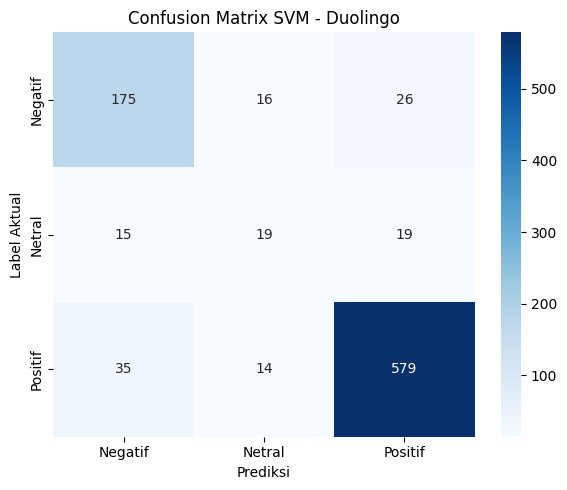

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_duo, y_pred_duo)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Prediksi")
plt.ylabel("Label Aktual")
plt.title("Confusion Matrix SVM - Duolingo")
plt.tight_layout()
plt.show()


###Training HelloTalk

In [79]:
model.fit(X_train_hello, y_train_hello)
y_pred_hello = model.predict(X_test_hello)

print("Akurasi HelloTalk:", accuracy_score(y_test_hello, y_pred_hello))
print(classification_report(y_test_hello, y_pred_hello, target_names=le.classes_))


Akurasi HelloTalk: 0.8172413793103448
              precision    recall  f1-score   support

     Negatif       0.62      0.74      0.68        95
      Netral       0.67      0.70      0.68       112
     Positif       0.93      0.87      0.90       373

    accuracy                           0.82       580
   macro avg       0.74      0.77      0.75       580
weighted avg       0.83      0.82      0.82       580



###Confusion matrix HelloTalk

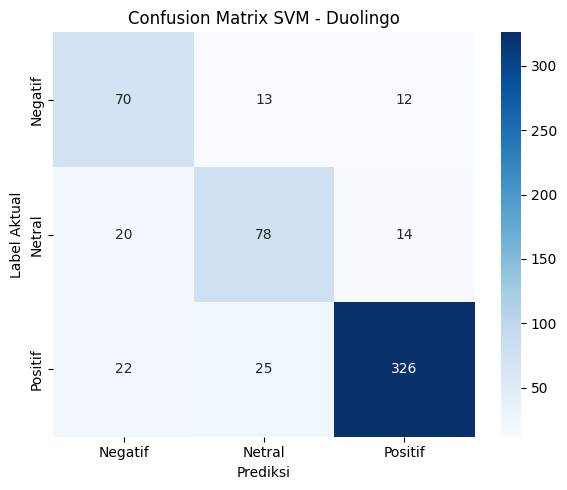

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_hello, y_pred_hello)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Prediksi")
plt.ylabel("Label Aktual")
plt.title("Confusion Matrix SVM - Duolingo")
plt.tight_layout()
plt.show()


###Try smote

In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_duo_smote, y_train_duo_smote = smote.fit_resample(
    X_train_duo, y_train_duo
)

X_train_hello_smote, y_train_hello_smote = smote.fit_resample(
    X_train_hello, y_train_hello
)


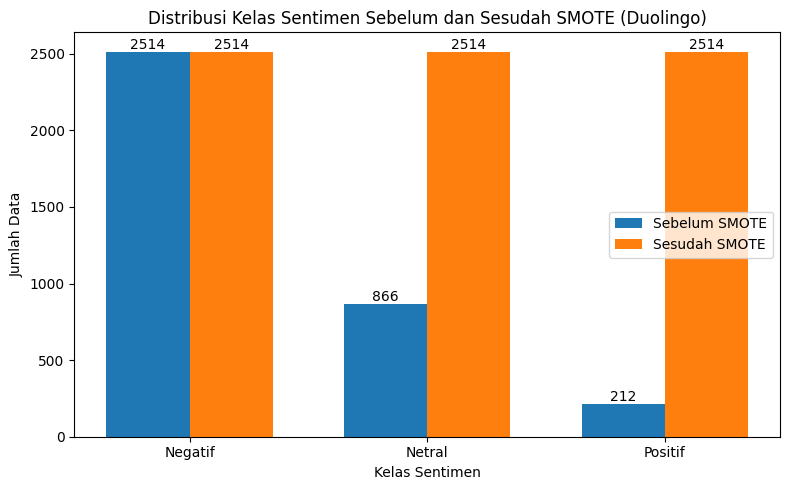

In [83]:
from collections import Counter

before_smote = Counter(y_train_duo)
after_smote = Counter(y_train_duo_smote)

df_dist = pd.DataFrame({
    "Sentimen": before_smote.keys(),
    "Sebelum SMOTE": before_smote.values(),
    "Sesudah SMOTE": [after_smote[k] for k in before_smote.keys()]
})

x = np.arange(len(df_dist["Sentimen"]))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(
    x - width/2,
    df_dist["Sebelum SMOTE"],
    width,
    label="Sebelum SMOTE"
)

plt.bar(
    x + width/2,
    df_dist["Sesudah SMOTE"],
    width,
    label="Sesudah SMOTE"
)

# Tambahkan angka di atas bar
for i in range(len(x)):
    plt.text(
        x[i] - width/2,
        df_dist["Sebelum SMOTE"][i],
        df_dist["Sebelum SMOTE"][i],
        ha="center",
        va="bottom"
    )
    plt.text(
        x[i] + width/2,
        df_dist["Sesudah SMOTE"][i],
        df_dist["Sesudah SMOTE"][i],
        ha="center",
        va="bottom"
    )

plt.xticks(x, le.classes_)
plt.ylabel("Jumlah Data")
plt.xlabel("Kelas Sentimen")
plt.title("Distribusi Kelas Sentimen Sebelum dan Sesudah SMOTE (Duolingo)")
plt.legend()
plt.tight_layout()
plt.show()


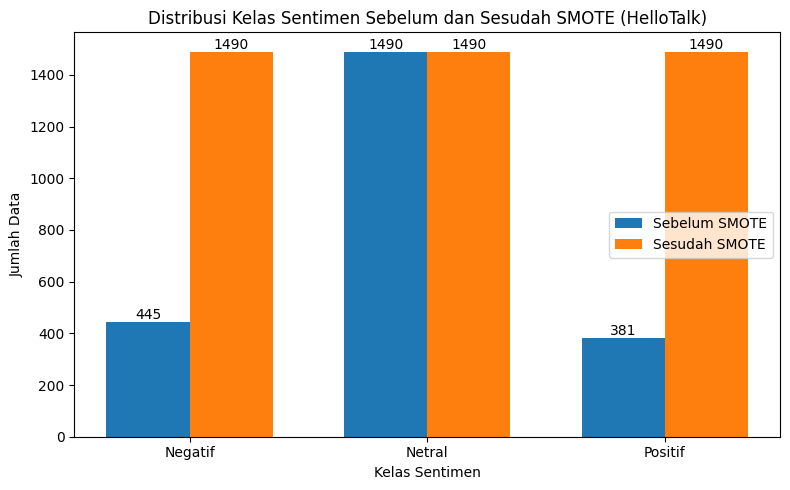

In [86]:
from collections import Counter

before_smote = Counter(y_train_hello)
after_smote = Counter(y_train_hello_smote)

df_dist = pd.DataFrame({
    "Sentimen": before_smote.keys(),
    "Sebelum SMOTE": before_smote.values(),
    "Sesudah SMOTE": [after_smote[k] for k in before_smote.keys()]
})

x = np.arange(len(df_dist["Sentimen"]))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(
    x - width/2,
    df_dist["Sebelum SMOTE"],
    width,
    label="Sebelum SMOTE"
)

plt.bar(
    x + width/2,
    df_dist["Sesudah SMOTE"],
    width,
    label="Sesudah SMOTE"
)

# Tambahkan angka di atas bar
for i in range(len(x)):
    plt.text(
        x[i] - width/2,
        df_dist["Sebelum SMOTE"][i],
        df_dist["Sebelum SMOTE"][i],
        ha="center",
        va="bottom"
    )
    plt.text(
        x[i] + width/2,
        df_dist["Sesudah SMOTE"][i],
        df_dist["Sesudah SMOTE"][i],
        ha="center",
        va="bottom"
    )

plt.xticks(x, le.classes_)
plt.ylabel("Jumlah Data")
plt.xlabel("Kelas Sentimen")
plt.title("Distribusi Kelas Sentimen Sebelum dan Sesudah SMOTE (HelloTalk)")
plt.legend()
plt.tight_layout()
plt.show()


In [89]:
from sklearn.svm import LinearSVC

model_svm = LinearSVC(
    C=1.0,
    random_state=42
)


In [90]:
model_svm.fit(X_train_duo_smote, y_train_duo_smote)
y_pred_duo = model_svm.predict(X_test_duo)

print("Akurasi Duolingo:", accuracy_score(y_test_duo, y_pred_duo))
print(classification_report(
    y_test_duo,
    y_pred_duo,
    target_names=le.classes_
))


Akurasi Duolingo: 0.8552338530066815
              precision    recall  f1-score   support

     Negatif       0.79      0.80      0.79       217
      Netral       0.37      0.42      0.39        53
     Positif       0.93      0.91      0.92       628

    accuracy                           0.86       898
   macro avg       0.69      0.71      0.70       898
weighted avg       0.86      0.86      0.86       898



In [92]:
model_svm.fit(X_train_hello_smote, y_train_hello_smote)
y_pred_duo = model_svm.predict(X_test_hello)

print("Akurasi HelloTalk:", accuracy_score(y_test_hello, y_pred_hello))
print(classification_report(
    y_test_hello,
    y_pred_hello,
    target_names=le.classes_
))


Akurasi HelloTalk: 0.8172413793103448
              precision    recall  f1-score   support

     Negatif       0.62      0.74      0.68        95
      Netral       0.67      0.70      0.68       112
     Positif       0.93      0.87      0.90       373

    accuracy                           0.82       580
   macro avg       0.74      0.77      0.75       580
weighted avg       0.83      0.82      0.82       580

